In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data source: https://www.kaggle.com/code/nvssrkameswar/parkinsons-disease-detection/data

# Data import
 -- Import data
 
 -- Overview of dataset

 -- Split dataset into training, and testing
 

In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: parkinsons.data         
  inflating: parkinsons.names        


In [ ]:
for dirname, _, filenames in os.walk('/content/New'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/New/parkinsons.data')

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# overview of the dataset
# Given that we have 195 image examples, it only contains 22 features to classify the status
print("\n Overview of the dataset")
print(df.info())


 Overview of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               

In [ ]:
# Data has 75% parkinson cases, and the remaining 25% are normal.
df.value_counts('status')

status
1    147
0     48
dtype: int64

In [ ]:
# splitting the features in X and traget variable in y
X = df.drop(columns=['name','status']).values
y = df.status.values

In [ ]:
# splitting the data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=41)

# Training data analysis

In [ ]:
X_train[1,:]

array([ 1.835200e+02,  2.168140e+02,  1.613400e+02,  1.466000e-02,
        8.000000e-05,  8.490000e-03,  8.190000e-03,  2.546000e-02,
        6.050000e-02,  6.180000e-01,  2.865000e-02,  4.101000e-02,
        6.359000e-02,  8.595000e-02,  6.057000e-02,  1.436700e+01,
        4.780240e-01,  7.689740e-01, -4.276605e+00,  3.557360e-01,
        3.142364e+00,  3.360850e-01])

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


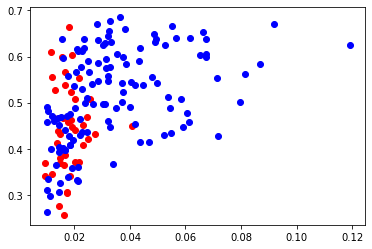

In [ ]:
# First question; Can we determine the status of the case using the rpde and vocal analysis -- MDVP:Shimmer - RPDE
plt.scatter(X_train[:,8][y_train ==0], X_train[:,16][y_train ==0], c='r')
plt.scatter(X_train[:,8][y_train ==1], X_train[:,16][y_train ==1], c='b')

plt.show()

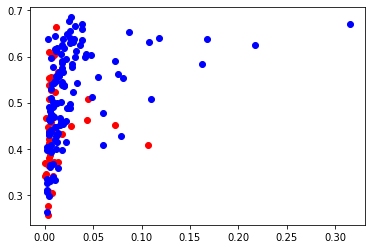

In [ ]:
# Second question; Can we determine the status of the case using the RPDE and NHR
plt.scatter(X_train[:,14][y_train ==0], X_train[:,16][y_train ==0], c='r')
plt.scatter(X_train[:,14][y_train ==1], X_train[:,16][y_train ==1], c='b')

plt.show()

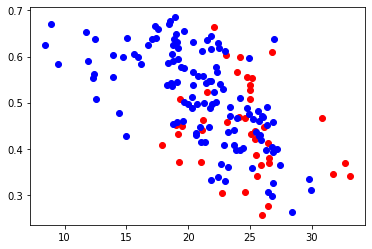

In [ ]:
# Third question; Can we determine the status of the case using the RPDE and DDA
plt.scatter(X_train[:,15][y_train ==0], X_train[:,16][y_train ==0], c='r')
plt.scatter(X_train[:,15][y_train ==1], X_train[:,16][y_train ==1], c='b')

plt.show()

# Modeling

## Decision Tree Classification


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
preds = clf.predict(X_test)
clf.score(X_test,y_test)

0.9666666666666667

## AdaBoost Classification

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=0)
clf.fit(X_train,y_train)

preds = clf.predict(X_test)
clf.score(X_test,y_test)

0.9333333333333333

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.9666666666666667

## Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.9666666666666667

## Hist Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9333333333333333

# XGBoost Evaluation

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[ 6,  1],
       [ 0, 23]])

In [31]:
from sklearn.metrics import precision_recall_fscore_support

pre,rec,f1,a = precision_recall_fscore_support(y_test, y_pred, average='macro')

acc = clf.score(X_test, y_test)

print('The accuracy is {0}, precision is {1}, recall is {2}, and f1-score is {3}'.format(acc,pre,rec,f1))

The accuracy is 0.9666666666666667, precision is 0.9791666666666667, recall is 0.9285714285714286, and f1-score is 0.9509001636661211
